# RandomPilotPicker

In [1]:
import pandas as pd
import numpy as np
import random

### Import league results from URL

In [2]:
url = r'http://ligajp.lzs-zveza.si/liga/2019'
tables = pd.read_html(url, attrs = {'class': 'scrollable'}) # Returns results table
data = tables[0] # Select table of interest

In [3]:
pilots = [pilot for pilot in data['Pilot']] # Pilots list
headers = data.columns

In [4]:
scores = [] # Score list
for index, row in data.iterrows():
    pilotScores = []
    for i in range(headers.get_loc('T1'), len(headers) - 1):
        pilotScores.append(row[i])
    scores.append(pilotScores)

### Create tickets from drummel

In [5]:
condition = np.asarray(scores) > 0 # Every scores greater than 0 is assumed as "present at task"
pilotPresentCount = [np.sum(row) for row in condition] # How many times was pilot present at league

In [6]:
# Fill drummel
tickets = []
i = 0
for pilot in pilots:
    for count in range(pilotPresentCount[i]):
        tickets.append(pilot)
    i = i + 1

# Pick winners

#### Picks N winners at random

In [7]:
N = 5 # Number of winners to pick
winners = random.sample(tickets, N)

#### Prints out winners

In [8]:
print('Congratulations to the winners:')
for winner in winners:
    print('\t' + winner)

Congratulations to the winners:
	Marko Novak
	Timotej Majdic
	Robert Hren
	Rok Lorger
	Dušan Orož


# Test distribution

In [9]:
import matplotlib.pyplot as plt

In [10]:
repeat = 1000000 # Repeat
lucky = [0] * len(pilots)
for i in range(repeat):
    winners = random.sample(tickets, N)
    for winner in winners:
        lucky[pilots.index(winner)] += 1  

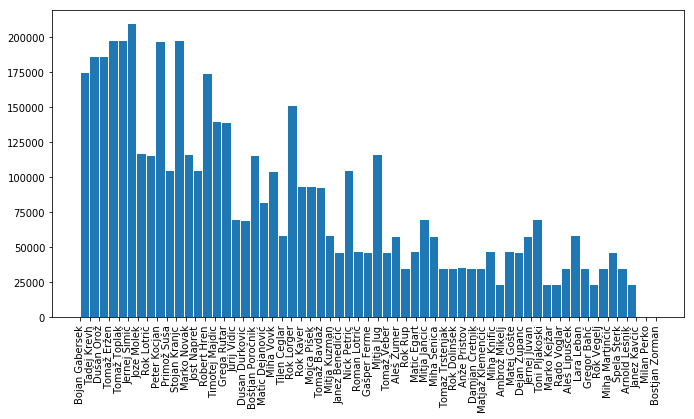

In [15]:
DPI = 106 # Varies on screen
fig = plt.figure(figsize=(1200/DPI,600/DPI))
plt.hist(pilots, len(pilots), weights = lucky, rwidth=0.9)
plt.xticks(pilots, pilots, rotation='vertical')
plt.show()